In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [76]:
fp = "Ice Cream Sales - temperatures.csv"
df = pd.read_csv(fp)

In [77]:
df.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [78]:
df["Temperature"].value_counts().head()

Temperature
77    15
66    14
84    13
68    12
74    12
Name: count, dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        365 non-null    int64  
 1   Ice Cream Profits  365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


In [80]:
df.describe()

,Temperature,Ice Cream Profits
count,365.000000,365.000000
mean,71.980822,52.103616
std,13.258510,15.989004
min,39.000000,11.880000
25%,63.000000,40.650000
50%,73.000000,53.620000
75%,82.000000,63.630000
max,101.000000,89.290000


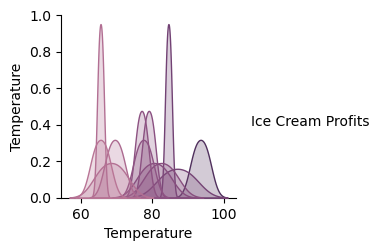

In [81]:
sns.pairplot(df, hue='Ice Cream Profits')
plt.show()

In [82]:
x = df[['Temperature']].values
y = df['Ice Cream Profits'].values

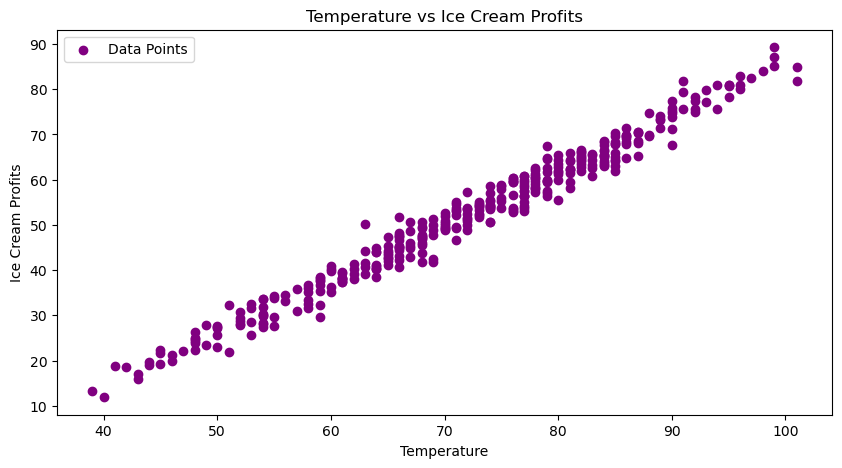

In [83]:
plt.figure(figsize=(10, 5))
plt.scatter(x, y, color='purple', label='Data Points')
plt.title('Temperature vs Ice Cream Profits')
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Profits')
plt.legend()
plt.show()

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [85]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [86]:
y_pred = model.predict(x_test)

In [87]:
accuracy = r2_score(y_test, y_pred)

print(f"R-squared Score (Accuracy): {accuracy:.2f}")

print(f"Coefficient (Slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

R-squared Score (Accuracy): 0.98
Coefficient (Slope): 1.19
Intercept: -33.66


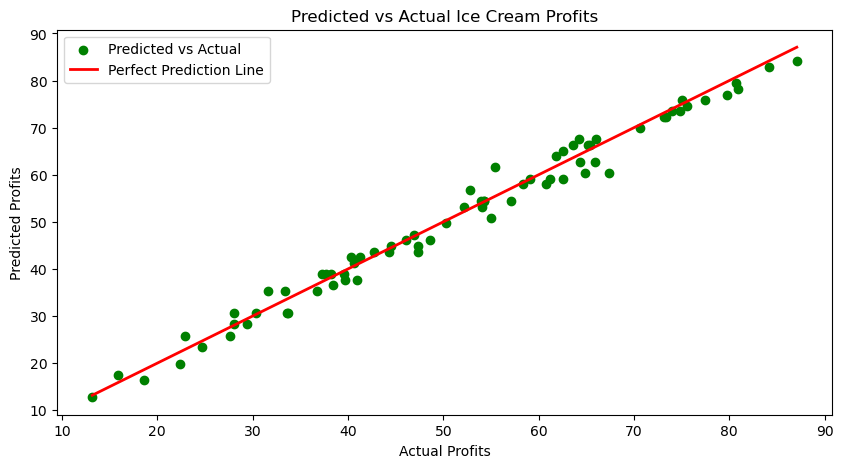

In [88]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction Line')
plt.title('Predicted vs Actual Ice Cream Profits')
plt.xlabel('Actual Profits')
plt.ylabel('Predicted Profits')
plt.legend()
plt.show()